In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [2]:
X, y = load_boston().data, load_boston().target.reshape(-1,1)

In [3]:
X.shape, y.shape

((506, 13), (506, 1))

In [4]:
class nn_regression(object):
    def __init__(self, eta = 0.005, iterations = 1000, layer_dims = [13,50,50,1], epsilon = 0.01, control = 0.5):
        self.eta = eta
        self.iterations = iterations
        self.layer_dims = layer_dims
        self.layers = len(layer_dims)
        self.epsilon = epsilon
        self.control = int(iterations * control)
        
    def fit(self,X,y):
        X_ = X.T
        y_ = y.T
        A0 = X_
        cost_ = []
        parameters = {}
        derivatives = {}
        m_ = len(y_)
        
        for l in range(1,self.layers):
            parameters['W'+str(l)] = np.random.randn(self.layer_dims[l],self.layer_dims[l-1]) * self.epsilon
            parameters['b'+str(l)] = np.zeros((self.layer_dims[l],1))
            
            
        i = 1
        while(i != self.iterations):
            #frw.prop
            Z1 = np.dot(parameters['W1'],A0) + parameters['b1']
            A1 = self.tanh(Z1)
            Z2 = np.dot(parameters['W2'],A1) + parameters['b2']
            A2 = self.tanh(Z2)
            Z3 = np.dot(parameters['W3'],A2) + parameters['b3']
            A3 = Z3
            ## cost
            cost = self.mae(y_,A3,m_)
            cost_.append(cost)
            # derivatives
            dZ3 = A3 - y_
            dW3 = (1/m_)*np.dot(dZ3,A2.T) 
            db3 = (1/m_)*np.sum(dZ3, axis = 1 , keepdims= True)
            dZ2 = np.dot(parameters['W3'].T,dZ3) * (1 - np.power(A2,2))  #(A2 * (1- A2))
            dW2 = (1/m_)*np.dot(dZ2,A1.T) 
            db2 = (1/m_)*np.sum(dZ2, axis = 1 , keepdims= True)
            dZ1 = np.dot(parameters['W2'].T,dZ2) * (1 - np.power(A1,2)) #(A1 * (1- A1))
            dW1 = (1/m_)*np.dot(dZ1,A0.T) 
            db1 = (1/m_)*np.sum(dZ1, axis = 1 , keepdims= True)
            #updates
            parameters['W3'] -= self.eta * dW3
            parameters['b3'] -= self.eta * db3
            parameters['W2'] -= self.eta * dW2
            parameters['b2'] -= self.eta * db2
            parameters['W1'] -= self.eta * dW1
            parameters['b1'] -= self.eta * db1
            #print
            if i % 100 ==0:
                print(f'epoch:{i} cost:{cost}')
            if i == self.control:
                history = pd.DataFrame(cost_, columns =['cost'])
                plt.figure(figsize =(14,4))
                plt.subplot(1,2,1)
                plt.plot(history.cost[:self.control], 'b')
                plt.plot(history.cost[self.control:], 'r')
                plt.show()
                q1 = input('do you wanna change learning rate) y/n')
                if q1.lower() == 'y':
                    self.eta = float(input('please insert new learning rate'))
            i += 1
        history = pd.DataFrame(cost_, columns=['cost'])
        plt.figure(figsize =(14,4))
        plt.subplot(1,2,1)
        plt.plot(history.cost[:self.control], 'b')
        plt.plot(history.cost[self.control:], 'r')
        plt.subplot(1,2,2)
        plt.plot(history.cost[self.control:], 'g')
        plt.show()
        return parameters,A3
    
    def sigmoid(self,z):
        return 1/ (1+ np.exp(-z))
    
    def tanh(self,z):
        return (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))
    
    def mae(self,y_true,y_pred,m_):
        return np.sum(np.abs(y_true - y_pred))/m_

<ipython-input-4-6c1477406ad7>:81: RuntimeWarning: overflow encountered in exp
  return (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))
<ipython-input-4-6c1477406ad7>:81: RuntimeWarning: invalid value encountered in divide
  return (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))


epoch:100 cost:nan
epoch:200 cost:nan
epoch:300 cost:nan
epoch:400 cost:nan
epoch:500 cost:nan
epoch:600 cost:nan
epoch:700 cost:nan
epoch:800 cost:nan
epoch:900 cost:nan
epoch:1000 cost:nan
epoch:1100 cost:nan
epoch:1200 cost:nan
epoch:1300 cost:nan
epoch:1400 cost:nan
epoch:1500 cost:nan
epoch:1600 cost:nan
epoch:1700 cost:nan
epoch:1800 cost:nan
epoch:1900 cost:nan
epoch:2000 cost:nan
epoch:2100 cost:nan
epoch:2200 cost:nan
epoch:2300 cost:nan
epoch:2400 cost:nan
epoch:2500 cost:nan
epoch:2600 cost:nan
epoch:2700 cost:nan
epoch:2800 cost:nan
epoch:2900 cost:nan
epoch:3000 cost:nan
epoch:3100 cost:nan
epoch:3200 cost:nan
epoch:3300 cost:nan
epoch:3400 cost:nan
epoch:3500 cost:nan
epoch:3600 cost:nan
epoch:3700 cost:nan
epoch:3800 cost:nan
epoch:3900 cost:nan
epoch:4000 cost:nan
epoch:4100 cost:nan
epoch:4200 cost:nan
epoch:4300 cost:nan
epoch:4400 cost:nan
epoch:4500 cost:nan
epoch:4600 cost:nan
epoch:4700 cost:nan
epoch:4800 cost:nan
epoch:4900 cost:nan
epoch:5000 cost:nan


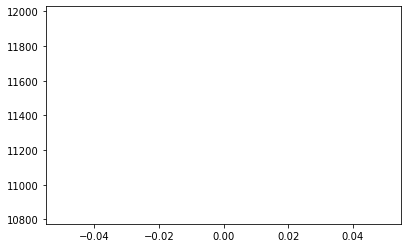

do you wanna change learning rate) y/nn
epoch:5100 cost:nan
epoch:5200 cost:nan
epoch:5300 cost:nan
epoch:5400 cost:nan
epoch:5500 cost:nan
epoch:5600 cost:nan
epoch:5700 cost:nan
epoch:5800 cost:nan
epoch:5900 cost:nan
epoch:6000 cost:nan
epoch:6100 cost:nan
epoch:6200 cost:nan
epoch:6300 cost:nan
epoch:6400 cost:nan
epoch:6500 cost:nan
epoch:6600 cost:nan
epoch:6700 cost:nan
epoch:6800 cost:nan
epoch:6900 cost:nan
epoch:7000 cost:nan
epoch:7100 cost:nan
epoch:7200 cost:nan
epoch:7300 cost:nan
epoch:7400 cost:nan
epoch:7500 cost:nan
epoch:7600 cost:nan
epoch:7700 cost:nan
epoch:7800 cost:nan
epoch:7900 cost:nan
epoch:8000 cost:nan
epoch:8100 cost:nan
epoch:8200 cost:nan
epoch:8300 cost:nan
epoch:8400 cost:nan
epoch:8500 cost:nan
epoch:8600 cost:nan
epoch:8700 cost:nan
epoch:8800 cost:nan
epoch:8900 cost:nan
epoch:9000 cost:nan
epoch:9100 cost:nan
epoch:9200 cost:nan
epoch:9300 cost:nan
epoch:9400 cost:nan
epoch:9500 cost:nan
epoch:9600 cost:nan
epoch:9700 cost:nan
epoch:9800 cost:nan


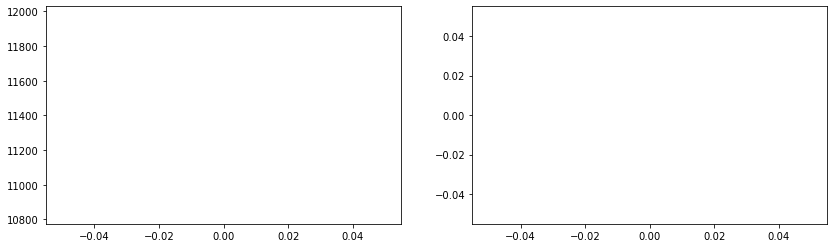

In [7]:
parameters, y_pred  = nn_regression(eta = 0.0005, iterations= 10000, epsilon= 0.01, layer_dims= [13,50,60,1]).fit(X,y)

In [ ]:
np.mean(y)

In [ ]:
y

In [ ]:
y_pred

In [ ]:
parameters

In [12]:
class nn_2layers_regression(object):
    def __init__(self, eta = 0.005, iteration = 1000, epsilon = 0.01, layer_dims =[13,40,40,1]):
        self.eta = eta
        self.iteration = iteration
        self.epsilon = epsilon
        self.layer_dims = layer_dims
        self.layer = len(layer_dims)
        
    def fit(self,X,y):
        X_ = X.T
        y_ = y.T
        m_ = len(y)
        A0 = X_
        cost_ = []
        i = 1
        parameters = {}
        for l in range(1,self.layer):
            parameters['W'+str(l)] = np.random.randn(self.layer_dims[l],self.layer_dims[l-1]) * self.epsilon
            parameters['b'+str(l)] = np.zeros((self.layer_dims[l],1))
            
        while(i != self.iteration):
            #forward prop.
            Z1 =  np.dot(parameters['W1'],A0) + parameters['b1']
            A1 =  self.tanh(Z1)
            Z2 =  np.dot(parameters['W2'],A1) + parameters['b2']
            A2 =  self.tanh(Z2)
            Z3 =  np.dot(parameters['W3'],A2) + parameters['b3']
            A3 =  Z3
            #cost 
            cost = self.mae(y_, A3, m_)
            cost_.append(cost)
            #derivatives
            dZ3 =  A3 - y_
            dW3 =  (1/m_) * np.dot(dZ3,A2.T)
            db3 =  (1/m_) * np.sum(dZ3, axis = 1, keepdims= True)
            dZ2 =  np.dot(parameters['W3'].T,dZ3) * (1 - np.power(A2,2)) #(A2 * (1-A2))
            dW2 =  (1/m_) * np.dot(dZ2,A1.T)
            db2 =  (1/m_) * np.sum(dZ2, axis = 1, keepdims= True)
            dZ1 =  np.dot(parameters['W2'].T,dZ2)  * (1 - np.power(A1,2)) # (A1 * (1-A1))
            dW1 =  (1/m_) * np.dot(dZ1,A0.T)
            db1 =  (1/m_) * np.sum(dZ1, axis = 1, keepdims= True)
            #backprog
            parameters['W3'] -= self.eta * dW3
            parameters['b3'] -= self.eta * db3
            parameters['W2'] -= self.eta * dW2
            parameters['b2'] -= self.eta * db2
            parameters['W1'] -= self.eta * dW1
            parameters['b1'] -= self.eta * db1
            if i % 100 ==0:
                print(f'epoch:{i}: cost:{cost}:')
            i += 1
        history = pd.DataFrame(cost_, columns = ['cost'])
        plt.figure(figsize = (14,4))
        plt.subplot(1,1,1)
        plt.plot(history.cost)
        plt.show()
        return parameters
    
    def sigmoid(self,z):
        return 1 / (1 + np.exp(-z))
    
    def mae(self,y_true,y_pred,m_):
        return np.sum(np.abs(y_true - y_pred))/m_
    
    def tanh(self,z):
        return (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))

epoch:100: cost:7.122199676483257:
epoch:200: cost:5.61069146692803:
epoch:300: cost:6.111448784454868:
epoch:400: cost:5.764359471659374:
epoch:500: cost:5.440570642623843:
epoch:600: cost:5.895493527799837:
epoch:700: cost:5.787164209592133:
epoch:800: cost:5.75987827552835:
epoch:900: cost:5.41323762978558:
epoch:1000: cost:5.901208814037393:
epoch:1100: cost:5.415608397597116:
epoch:1200: cost:5.474974691081364:
epoch:1300: cost:5.244645845877114:
epoch:1400: cost:5.785021159846536:
epoch:1500: cost:5.633605339399854:
epoch:1600: cost:5.713879838108767:
epoch:1700: cost:5.424526605282764:
epoch:1800: cost:5.5248110059359234:
epoch:1900: cost:5.694610657430633:
epoch:2000: cost:5.212334404076228:
epoch:2100: cost:5.411525378480587:
epoch:2200: cost:5.319484842595307:
epoch:2300: cost:5.459069100362404:
epoch:2400: cost:5.824722275655625:
epoch:2500: cost:5.668778600644112:
epoch:2600: cost:5.782755935446524:
epoch:2700: cost:5.33508826247398:
epoch:2800: cost:5.344386268654828:
epoc

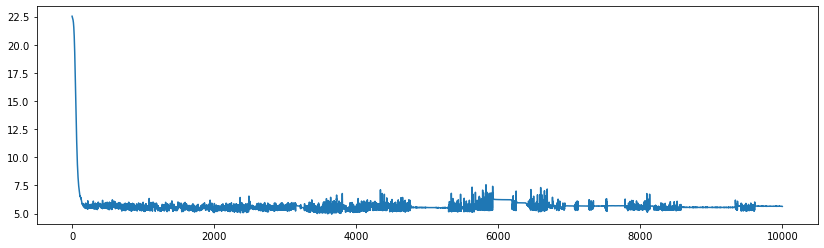

In [13]:
parameters = nn_2layers_regression(eta = 0.0005, iteration= 10000, epsilon= 0.01, layer_dims= [13,50,60,1]).fit(X,y)